# Classification Trees

## Grafos y árboles.
Los grafos en matematicas son un conjunto de nodos y aristas G(A, V) donde los nodos están conectados por las aristas.  

Los grafos conexos son tales que existe un camino entre cualesquiera dos nodos.

Los árboles son grafos tales que son conexos y no hay ciclos entre los nodos. 



## Árboles de Decisión

### Nodos (Vertices)
Los nodos reprentan un decisión lógica, siempre binaria. Puede ser presentado en forma de preguntas donde las respuestas posibles son unicamente si o no. 

Hay tres tipos de nodos en un árbol de decisión: ***Raiz, Nodos Internos y Hojas.***



### Links (Aristas)
Sirven para unir nodos, pueden tener pesos para darle distinta importancia a distintas decisiones. En la clase solo vamos a ver aristas sin pesos.

# Ejemplo: Iris

Vamos a ver que en la contrucción de árboles de decisión se 
presentan tres preguntas claves: 
    1. ¿Cómo seleccionamos las particiones en los nodos?
    2. ¿Cuándo podemos declarar un nodo como términal?
    3. ¿Cómo asignamos cada nodo terminal a una clase?

## ¿Cómo hacer las mejores particiones de los datos? 

En el ejemplo anterior veiamos que la división era Petal Length<=2.45 o >2.45 pero porque?

### Impureza en los nodos. 

Sean $p_i = p(C_i)$ las proporciones para cada una de las clases $C_i$ en un nodo $t$, tales que: 

$$ \sum_{i} p(i|t) = 1 $$

Definimos una medida de impureza en los nodos $i(t)$ de manera que:

* $i(t)$ es máximo cuando todos las clases están en una hoja del nodo

* $i(t)$ es cero cuando en el nodo solamente hay una clase. 

Al elegir la mejor división en los datos vamos a buscar que nuestra medida de impureza se reduzca.

### Information Gain (Ganancia de Información)

Claude Shannon creó una forma de medir la cantidad de información en un mensaje llamada entroía de Shannon y vamos a usarla para crear un función de impureza. 

Sea $D$ una partición de los datos en un nodo $N$ cualquiera. Si tenemos $k$ clases que predecir y $p_i$ es la probabilidad que una observación elegida al azar pertenezca a la clase $C_i$, entonces la cantidad de información promedio necesaria para identificar correctamente cada una de las clases en D viene dada por: 

$$ \text{Info}(D) = - \sum_{i=0}^k p_i \log{p_i}$$

Si ahora el nodo $N$ se divide en los nodos $N_1$ y $N_2$ usando el atributo (variable A), entonces la información que obtenemos de esa separación es: 

$$ \text{Info}_A(D) = \frac{|D_1|}{|D|} Info(D_1) + \frac{|D_2|}{|D|} Info(D_2)$$

La ganancia de información es el cambio de entropia antes y después de la partición:
$$ \text{Info}(D)-\text{Info}_A(D)$$

La mejor división es la que tenga la ganancia de información más alta.

### Gini Impurity (Impureza)

Otra medida de la impureza en un nodo es el coeficiente de Gini. Si tenemos $k$ clases que predecir y $p_i$ es la probabilidad que una observación elegida al azar pertenezca a la clase $C_i$, entonces la medida de impueza en el nodo es: 


$$ \text{Gini}(D) = 1- \sum_{i=0}^k p_i^2$$

Si ahora el nodo $N$ se divide en los nodos $N_1$ y $N_2$ usando el atributo (variable A), entonces la información que obtenemos de esa separación es: 

$$\text{Gini}_A(D) = \frac{|D_1|}{|D|} \text{Gini}(D_1) + \frac{|D_2|}{|D|} \text{Gini}(D_2)$$

La mejor división es la que genere la menor impureza.

# Ejemplo: 

## ¿Cuándo podemos declarar un nodo como términal?

Cuando la ganancia de información o la disminución de la impureza sea nula, entonces paramos con el proceso de división.

## ¿Cómo asignamos cada nodo terminal a una clase?

La clase asignada va a ser tal que Si tenemos $k$ clases que predecir y $p_i$ es la probabilidad que una observación elegida al azar pertenezca a la clase $C_i$, entonces la clase asignada a un nodo terminal es tal que: 

$$\max_i p_i$$

Es decir seleccionamos la clase que más se repite o la más probable. 

## Error de Clasificación

La métrica por excelencia para decidir si nuestro arbol de clasificación está bien construido es la tasa de claficiaciones erradas: 

$$1/n \sum_{i=0}^n I(y_{pred} \not= y_{real})$$

donde n es el tamaño del set de prueba. 

In [38]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split


In [44]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)


In [55]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3 )
clf_fit= clf.fit(X_train, y_train)


In [41]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
clf_fit.score(X_test, y_test)

0.9666666666666667

# Visualizar un árbol de decisión.

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

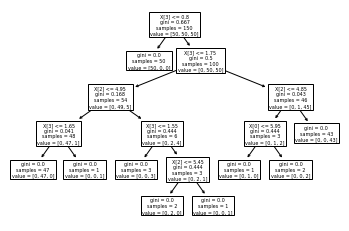

In [53]:
tree.plot_tree(clf.fit(iris.data, iris.target)) 

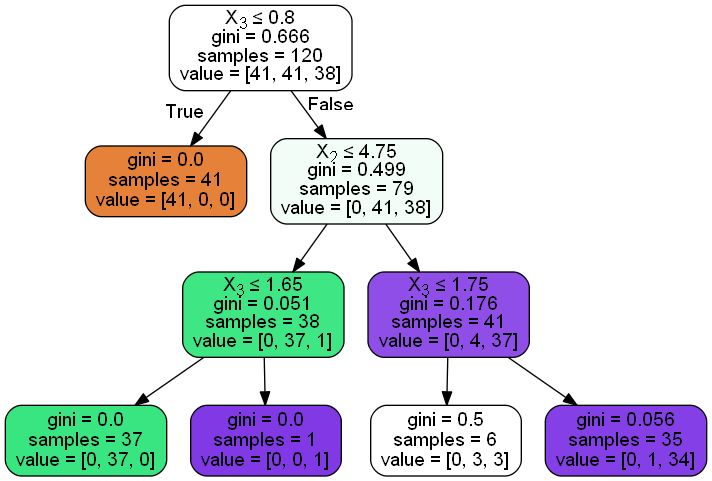

In [57]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

Algunas ventajas de los árboles de decisión: 
    
* Faciles de entender e interpretar. Pueden ser visualizados facilmente. 
* Requiere poca preparacion de los datos. Solamente quitar nulos (para Scikit-Learn).
* Puede tomar tipos de datos númericos y categóricos.
* Es un modelo de "caja blanca". Podemos ver y explicar las decisiones del modelo. 
* No es necesario tener supuestos de las distribuciones de los datos.

Y desventajas:

* Pueden crear árboles muy complejos que no generalizan bien. Sobreajustan mucho, una hoja por clase.
* Pueden ser inestables: variaciones menores en los datos dan paso a arboles totalmente diferentes. Puede ser mejorado con bagging o boosting. (Próximas clases)

* Tienen sesgos hacia clases si el dataset está desbalanceado. Es mejor balancear antes.